In [1]:
import numpy as np
import pandas as pd
# visualization
import seaborn as sns #optional but nice to have!!!
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv('crime.csv',engine = 'python')

# GROUP BY YEAR
data.groupby('YEAR').count().rename(columns={'INCIDENT_NUMBER':'CRIMES'})[['CRIMES']]

,CRIMES
YEAR,
2015,53392
2016,99134
2017,100938
2018,74356


In [2]:
# GROUP BY MONTH
data.groupby('MONTH').count().rename(columns={'INCIDENT_NUMBER':'CRIMES'})[['CRIMES']]

,CRIMES
MONTH,
1,23625
2,21661
3,24156
4,24108
5,26242
6,30622
7,34640
8,35137
9,34023


In [3]:
# GROUP BY DAY_OF_WEEK
data.groupby('DAY_OF_WEEK').count().rename(columns={'INCIDENT_NUMBER':'CRIMES'})[['CRIMES']]

,CRIMES
DAY_OF_WEEK,
Friday,49758
Monday,46970
Saturday,45969
Sunday,41374
Thursday,47872
Tuesday,47726
Wednesday,48151


In [4]:
# GROUP BY DISTRICT
data.groupby('DISTRICT').count().rename(columns={'INCIDENT_NUMBER':'CRIMES'})[['CRIMES']]

,CRIMES
DISTRICT,
A1,36735
A15,6663
A7,13634
B2,51288
B3,36400
C11,43817
C6,24190
D14,20632
D4,43338


In [5]:
# MAX SHOOTINGS YEAR

shootings = data[data.SHOOTING == 'Y']
shootings_per_year = shootings.groupby(['YEAR']).size()
shootings_per_district = shootings.groupby(['DISTRICT']).size()

print("Most shootings in:", shootings_per_year.idxmax(),"\nShootings occurred:", shootings_per_year.max())
print("Most shootings in District:", shootings_per_district.idxmax(),"\nShootings occurred:", shootings_per_district.max())

Most shootings in: 2017 
Shootings occurred: 371
Most shootings in District: B2 
Shootings occurred: 352


In [6]:
# DAY OR NIGHT

# create new column
data['DAY_OR_NIGHT'] = ['DAY' if ((x >= 6) & (x < 18)) else 'NIGHT' for x in data['HOUR']]

# get max occurrence
most_crimes_in = data['DAY_OR_NIGHT'].value_counts()[:1]

print ("Most crimes in:", most_crimes_in.index[0], "\nCrimes occurred:", most_crimes_in.iloc[0])

data.groupby(['INCIDENT_NUMBER']).head()

Most crimes in: DAY 
Crimes occurred: 189442


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DAY_OR_NIGHT
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",NIGHT
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",NIGHT
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",NIGHT
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",NIGHT
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",NIGHT
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,2018-10-02 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)",NIGHT
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)",NIGHT
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,2018-10-03 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)",NIGHT
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,2018-10-03 19:27:51,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)",NIGHT
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)",NIGHT


In [7]:
# MOST COMMON OFFENSE_CODE_GROUP

day_crimes = data[data["DAY_OR_NIGHT"] == 'DAY']

print("The most common offence code group during the day is:",
      day_crimes.groupby(['OFFENSE_CODE_GROUP']).size().idxmax(),
      "with", day_crimes.groupby(['OFFENSE_CODE_GROUP']).size().max() ,"occurrences")

The most common offence code group during the day is: Motor Vehicle Accident Response with 22743 occurrences


In [8]:
# DATA PREPARATION

data.isnull().sum()/data.shape[0]

INCIDENT_NUMBER        0.000000
OFFENSE_CODE           0.000000
OFFENSE_CODE_GROUP     0.000000
OFFENSE_DESCRIPTION    0.000000
DISTRICT               0.005412
REPORTING_AREA         0.000000
SHOOTING               0.996782
OCCURRED_ON_DATE       0.000000
YEAR                   0.000000
MONTH                  0.000000
DAY_OF_WEEK            0.000000
HOUR                   0.000000
UCR_PART               0.000284
STREET                 0.033485
Lat                    0.062937
Long                   0.062937
Location               0.000000
DAY_OR_NIGHT           0.000000
dtype: float64

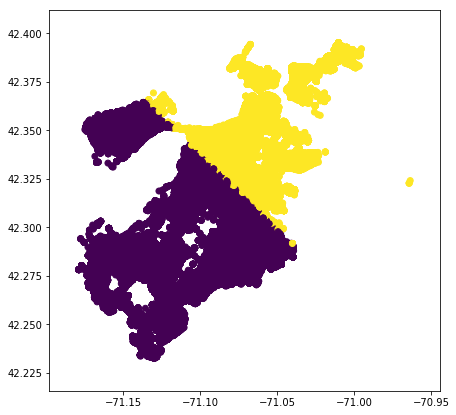

In [16]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn import datasets

location = data[['Lat', 'Long']]
location = location.dropna()   #remove NaNs

location = location.loc[(location['Lat'] > 40) & (location['Long'] < -60)]   
X = location
km = KMeans(n_clusters = 2)
km.fit(X)
km.predict(X)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
plt.scatter(x=location['Long'], y=location['Lat'], c=labels.astype(np.float))

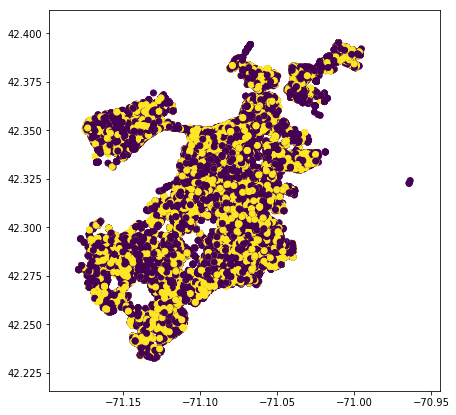

In [17]:
# LOCATION OFFENSE_CODE

location = data[['Lat', 'Long', 'OFFENSE_CODE']]
location = location.dropna()   #remove NaNs

location = location.loc[(location['Lat'] > 40) & (location['Long'] < -60)]   
X = location
km = KMeans(n_clusters = 2)
km.fit(X)
km.predict(X)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
plt.scatter(x=location['Long'], y=location['Lat'], c=labels.astype(np.float))

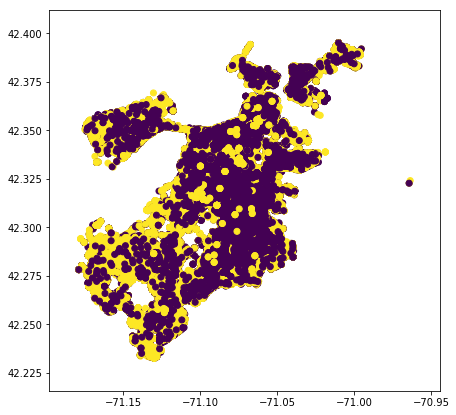

In [18]:
# LOCATION MONTH

location = data[['Lat', 'Long', 'MONTH']]
location = location.dropna()   #remove NaNs

location = location.loc[(location['Lat'] > 40) & (location['Long'] < -60)]   
X = location
km = KMeans(n_clusters = 2)
km.fit(X)
km.predict(X)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
plt.scatter(x=location['Long'], y=location['Lat'], c=labels.astype(np.float))